# INDIAN STARTUP ECOSYSTEM SURVEY

## Business Understanding

In this project, I am going to focus on the details of funding for these start-ups in India, where I will dive deep into a data containing all the details about fundings received by the start-ups, from 2018 to 2021 and communicate my findings and recommendations.

## Import The Necessary Libraries

In [1]:
import pyodbc 
from dotenv import dotenv_values
import pandas as pd 
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import sqlalchemy 
import warnings 
import numpy as np

warnings.filterwarnings('ignore')

## Load the first dataset 
#### To connect to one of the data sources(a database) I'll be working with, I need some credentials (username, password etc.) which cannot be shared or cannot be shown to the public, therefore I need to create a .env file which is going to house the environment variables. This environment variable will be used in creating a connection string to help connect to the database.

In [2]:
# load the environment variables from the env file into a dictionary
environment_variables=dotenv_values('.env')

# Get the values for the credentials set up in the .env file
database=environment_variables.get('database_name')
server=environment_variables.get('server_name')
username=environment_variables.get('login')
password=environment_variables.get('password')

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={Login};PWD={password}"
connection= pyodbc.connect(connection_string)

## Data Understanding and Preparation

The data for this project will be extracted from 3 different sources, as funding data for 2020 and 2021 are hosted on an SQL Server database, funding data for 2018 is hosted in a Github repository and 2019's funding data is hosted on a OneDrive.

First, I connect to the database to see the tables contained in it. I then go ahead to extract the data for 2020 and 2021 by assigning them appropriate variable names.

Data hosted on Github and OneDrive were downloaded to my local storage and then read in from there. 2018's data as a CSV file while data for 2019 is an excel file.

below are the common fields/columns for 2019, 2020 and 2021 and their descriptions

| Field           | Description                                                     |
|-----------------|-----------------------------------------------------------------|
| Company_Brand   | Name of start-up company                                        |
| Founded         | Year it was founded                                             |
| HeadQuarter     | Headquarters or location of the company                         |
| Sector          | Sector of the company                                           |
| What_it_does    | A brief description of what the company does                    |
| Founders        | Name(s) of the founder(s) of the company                        |
| Investor        | Name(s) of the investor(s) of the company                       |
| Amount          | Amount invested into the company by investor(s)                 |
| Stage           | Current stage of the startup (e.g. Pre-seed, Pre-series, Series A, Series D) |


2018 had different column names but most had the same meaning as the columns for 2019, 2020 and 2021
 Field           | Description                                                     |
|-----------------|-----------------------------------------------------------------|
| Company Name    | Name of start-up company                                        |
| Industry        | Sector of the company                                           |
| Round/Series    | Current stage of the startup                                    |
| Amount          | Amount invested into the company by investor(s)                 |
| Location        | Headquarters or location of the company                         |
| About Company   | A brief description of what the company does       

There will be renaming of columns to help in the merging of the data

In [3]:
# display the tables in the database 
query="SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE= 'BASE TABLE'"
data=pd.read_sql(query,connection)

data

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,LP1_startup_funding2021,BASE TABLE
1,dapDB,dbo,LP1_startup_funding2020,BASE TABLE


As seen above, there are two tables named LP1_startup_funding 2021 and LP1_startup_funding 2020. Both tables will be read independently to display their information

In [4]:
# select the 2021 table from the database and create dataframe 

query='select * from LP1_startup_funding2021'

data_2021=pd.read_sql(query, connection)

data_2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


In [5]:
data_2021['year_collected']=2021
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year_collected
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


In [6]:
# select the 2020 table from the database and create dataframe 

query='select * from LP1_startup_funding2020'

data_2020=pd.read_sql(query, connection)

data_2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None


In [7]:
data_2020['year_collected']=2020
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,year_collected
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020


##### Load the 2019 and 2018 datasets

In [8]:
data_2018=pd.read_csv(r"C:\Users\user\Documents\New folder\LP.1\startup_funding2018.csv")
data_2018['year_collected']=2018
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,year_collected
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


In [9]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    526 non-null    object
 1   Industry        526 non-null    object
 2   Round/Series    526 non-null    object
 3   Amount          526 non-null    object
 4   Location        526 non-null    object
 5   About Company   526 non-null    object
 6   year_collected  526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


The amount column contains a variation of currencies in both Rupees and Dollars. This means, the column requires cleaning to ensure the currency is uniform

In [10]:
data_2018['Amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

### Cleaning the Amount Column
A function is written which converts the amount to a string and removes trailspace, it then checks if the amount is empty or nan and returns np.nan, commas are removed and the Rupee is converted to dollar. Also, USD symbols are removed and plain numbers assumed to be dollar are returned as a float.

In [16]:
#Cleaning Amount Column
def clean_amount(Amount):
    try:
        # Convert to string if not already
        Amount = str(Amount).strip()
        if not Amount or Amount.lower() == 'nan':
            return np.nan
        
        # Remove commas
        Amount = Amount.replace(",", "")
        
        # Convert INR to USD
        if "₹" in Amount:
            Amount = Amount.replace("₹", "").strip()
            return round(float(Amount) / 70, 2)
        
        # Handle USD
        elif "$" in Amount:
            Amount = Amount.replace("$", "").strip()
            return round(float(Amount), 2)
        
        # Handle plain numbers, assume they are USD
        else:
            return round(float(Amount), 2)
    
    except ValueError:
        return np.nan

# Apply the clean_amount function to the 'Amount' column
df['Amount'] = df['Amount'].apply(clean_amount)

# Fill missing values with the median of the cleaned 'Amount' column
df['Amount'].fillna(df['Amount'].median(), inplace=True)

In [11]:
data_2019=pd.read_csv(r"C:\Users\user\Documents\New folder\LP.1\startup_funding2019.csv")
data_2019['year_collected']=2019
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,year_collected
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


## Concatenate the data frames 
Columns are renamed to match the other data

In [12]:
# rename all columns in each dataframe to conform to the 2021 dataset

data_2018.columns=['Company_Brand','Sector','Stage', 'Amount', 'HeadQuarter', 'What_it_does','year_collected']

data_2019.columns=['Company_Brand','Founded','HeadQuarter','Sector','What_it_does','Founders','Investor', 'Amount', 'Stage', 'year_collected']

In [13]:
# concatenate all the dataframes
df=pd.concat([data_2021, data_2020,data_2019, data_2018], axis=0)

df.shape

(2879, 11)

In [14]:
# save the dataframe df to a csv file 

df.to_csv('startup_funding2018-2021.csv')

### Data exploration and cleaning 

In [15]:
# display the dataframe 
df.head()
 

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year_collected,column10
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021,NaN
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021,NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021,NaN
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021,NaN
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 525
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company_Brand   2879 non-null   object 
 1   Founded         2110 non-null   float64
 2   HeadQuarter     2765 non-null   object 
 3   Sector          2861 non-null   object 
 4   What_it_does    2879 non-null   object 
 5   Founders        2334 non-null   object 
 6   Investor        2253 non-null   object 
 7   Amount          2879 non-null   float64
 8   Stage           1941 non-null   object 
 9   year_collected  2879 non-null   int64  
 10  column10        2 non-null      object 
dtypes: float64(2), int64(1), object(8)
memory usage: 269.9+ KB


In [18]:
df.isnull().sum()

Company_Brand        0
Founded            769
HeadQuarter        114
Sector              18
What_it_does         0
Founders           545
Investor           626
Amount               0
Stage              938
year_collected       0
column10          2877
dtype: int64

In [19]:
# Cleaning columns with missing values
df['Founded'].fillna(df['Founded'].median(), inplace= True) 
df['Founded'] = df['Founded'].astype(int)

In [20]:
# Cleaning the Sector column
import re
def sector_arrangement(sector, what_it_does):
    if not isinstance(sector, str) or sector.strip() == '':
        for desc, sec in description_to_sector.items():
            if re.search(desc, what_it_does, re.IGNORECASE):
                return sec
    else:
        return sector

def sector_arrangement(sector):
    if not isinstance(sector, str):
        return sector  # Return the value as is if it's not a string
    if re.search(r'bank|fintech|finance|crypto|account|credit|venture|crowd|blockchain', sector, re.IGNORECASE):
        return 'Finance'
    elif re.search(r'automotive|air transport|transport|logistics|vehicle|transportation', sector, re.IGNORECASE):
        return 'Transport'
    elif re.search(r'health|medical|pharmaceutical|health diagnostics|health care|hospital|biotechnology|biopharma|hygiene management|healthtech|laboratory|biotech', sector, re.IGNORECASE):
        return 'Health'
    elif re.search(r'brand marketing|marketing|event promotion|market', sector, re.IGNORECASE):
        return 'Marketing'
    elif re.search(r'farming|agriculture|nutrition|hauz khas|fishery', sector, re.IGNORECASE):
        return 'Agriculture'
    elif re.search(r'e-learning|edtech|education|communities|preschool|school', sector, re.IGNORECASE):
        return 'Education'
    elif re.search(r'real estate|home decor|accommodation|interior design|home design|home interior|co-living|construction', sector, re.IGNORECASE):
        return 'Real Estate'
    elif re.search(r'renewable energy|solar|energy|energy storage|battery|oil and gas|renewable|ev|electricity|purification|renewables', sector, re.IGNORECASE):
        return 'Energy'
    elif re.search(r'entertainment|media|news|video|digital media|fm|publication|ott|social network|music|digital platform|podcast|publishing|blogging', sector, re.IGNORECASE):
        return 'Media'
    elif re.search(r'fashion|jewelry|eyeglasses|eye wear|apparel|dating|celebrity|eyewear|d2c fashion|matrimony|textiles|d2c jewellery|footwear|arts', sector, re.IGNORECASE):
        return 'Style'
    elif re.search(r'gaming|games|sports', sector, re.IGNORECASE):
        return 'Game'
    else:
        return sector

df['Sector'] = df['Sector'].apply(sector_arrangement)

df['Sector'] = df.apply(lambda row: sector_arrangement(row['What_it_does']) if pd.isna(row['Sector']) or row['Sector'].strip() == '' else row['Sector'], axis=1)

In [21]:
#  Cleaning the HeadQuarter column
# Within the HeadQuarter column lies some info that do not belong, hence we remove them
df['HeadQuarter'] = df['HeadQuarter'].str.replace('Pharmaceuticals\t#REF!','', regex= False).str.strip()
df['HeadQuarter'] = df['HeadQuarter'].str.replace('Information Technology & Services','', regex= False).str.strip()
df['HeadQuarter'] = df['HeadQuarter'].str.replace('Online Media\t#REF!','', regex= False).str.strip()
df['HeadQuarter'] = df['HeadQuarter'].str.replace('Computer Games','', regex= False).str.strip()
df['HeadQuarter'] = df['HeadQuarter'].str.replace('Food & Beverages','', regex= False).str.strip()
df['HeadQuarter'] = df['HeadQuarter'].str.replace('Gurugram\t#REF!','', regex= False).str.strip()


In [22]:
# Calculate the mode of the 'HeadQuarter' column
mode_value = df['HeadQuarter'].mode()[0]

# Fill missing values with the mode
df['HeadQuarter'] = df['HeadQuarter'].fillna(mode_value)

In [23]:
# Cleaning the stage column
df['Stage'] = df['Stage'].replace('$6000000', np.nan)
df['Stage'] = df['Stage'].replace('$300000', np.nan)
df['Stage'] = df['Stage'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593', np.nan)
df['Stage'] = df['Stage'].replace('$1000000', np.nan)
df.head()



,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year_collected,column10
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021,NaN
1,upGrad,2015,Mumbai,Education,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None,2021,NaN
2,Lead School,2012,Mumbai,Education,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021,NaN
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021,NaN
4,FypMoney,2021,Gurugram,Finance,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021,NaN


In [24]:
# Calculate the mode of the 'HeadQuarter' column
mode_value = df['Stage'].mode()[0]

# Fill missing values with the mode
df['Stage'] = df['Stage'].fillna(mode_value)

In [25]:
# Cleaning the Founders column. Due to the high volume of null values, we will use a placeholder to represent the missing values
df['Founders'].fillna('Unknown', inplace= True)

In [26]:
# Cleaning the Investor column. Due to the high volume of null values, we will use a placeholder to represent the missing values
df['Investor'].fillna('Unknown', inplace= True)

Checking for duplicates

In [27]:
df.duplicated().sum()

24

In [28]:
df.drop_duplicates(inplace= True)

Dropping columns not needed 

In [29]:
# Column10 is dropped
df.drop(columns=['column10'], inplace= True)
df.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'year_collected'],
      dtype='object')

In [30]:
# Checking to see if all null values have been handled
df.isnull().sum()

Company_Brand     0
Founded           0
HeadQuarter       0
Sector            0
What_it_does      0
Founders          0
Investor          0
Amount            0
Stage             0
year_collected    0
dtype: int64

## Hypothesis Testing

The Null Hypothesis(H0) states the funding amount is influenced by the year the startup was founded.
 The Alternative Hypothesis(H1) states the funding amount is not influenced by the year the startup was founded.

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA for each factor
factors = ['Sector', 'Founded', 'Stage']
p_values = {}

for factor in factors:
    model = ols('Amount ~ {}'.format(factor), data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table['PR(>F)'][factor]
    p_value_decimal = round(float(p_value), 2)
    p_values[factor] = p_value_decimal

    print(f"Factor: {factor}, p-value: {p_value_decimal}")

# Define a threshold for significance
threshold = 0.05

# Compare p_values
significant_factors = [factor for factor, p_value in p_values.items() if p_value < threshold]
print(f"Significant factors with p-values below {threshold}: {significant_factors}")


Factor: Sector, p-value: 1.0
Factor: Founded, p-value: 0.25
Factor: Stage, p-value: 0.96
Significant factors with p-values below 0.05: []


## Conclusion

Looking at our factors assessed and their corresponding values which are above the thereshold we can accept our null hypothesis

## Visualizing Data

At this stage we display our data looking at some expolatory analysis

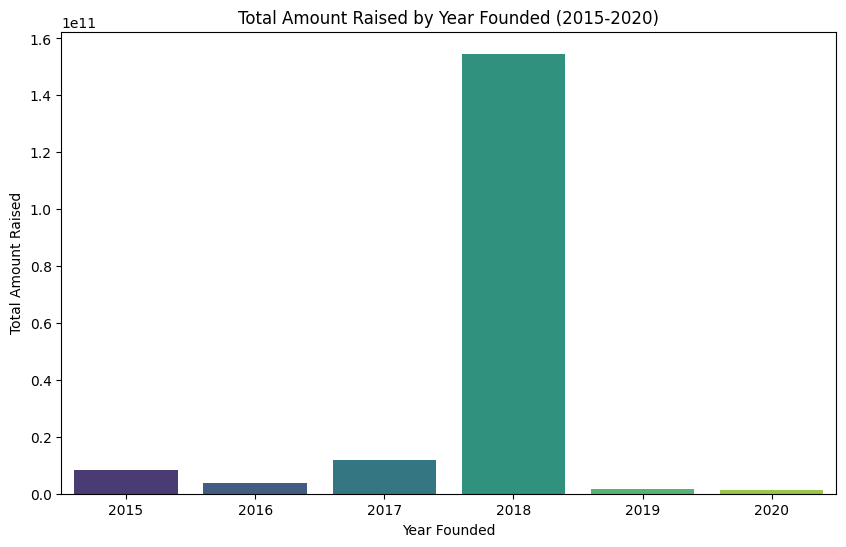

In [32]:
# Amount raised by year founded between a specific period
Raised_df = df[(df['Founded'] >= 2015) & (df['Founded'] <= 2020)]
yearly_funding = Raised_df.groupby('Founded')['Amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_funding, x='Founded', y='Amount', palette='viridis')
plt.title('Total Amount Raised by Year Founded (2015-2020)')
plt.xlabel('Year Founded')
plt.ylabel('Total Amount Raised')
plt.show()


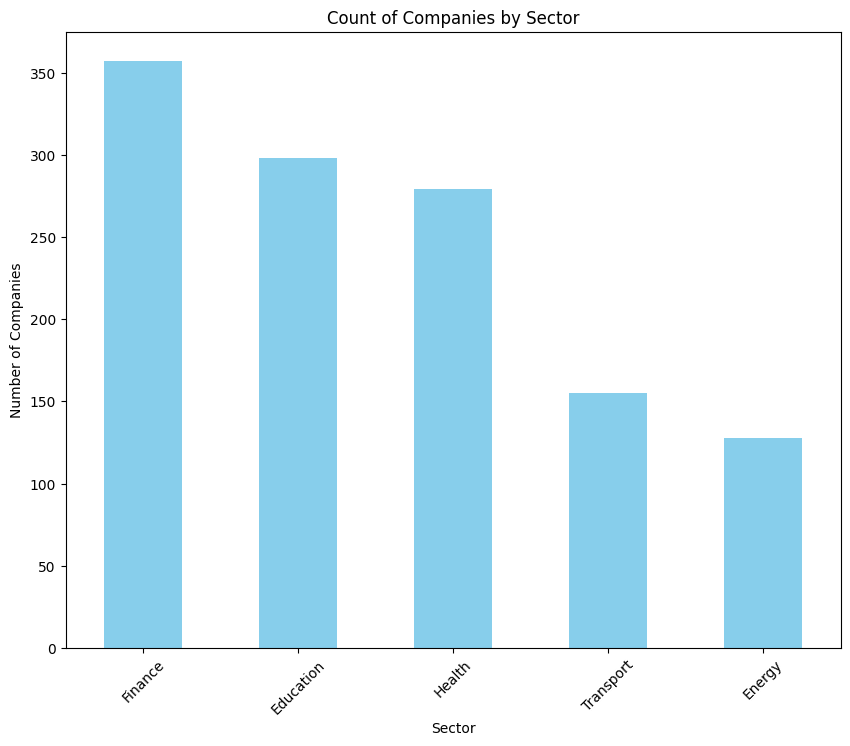

In [33]:
# count of Companies by sector
sector_counts = df['Sector'].value_counts().head(5)

# Plot the data
plt.figure(figsize=(10, 8))
sector_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Companies by Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.show()


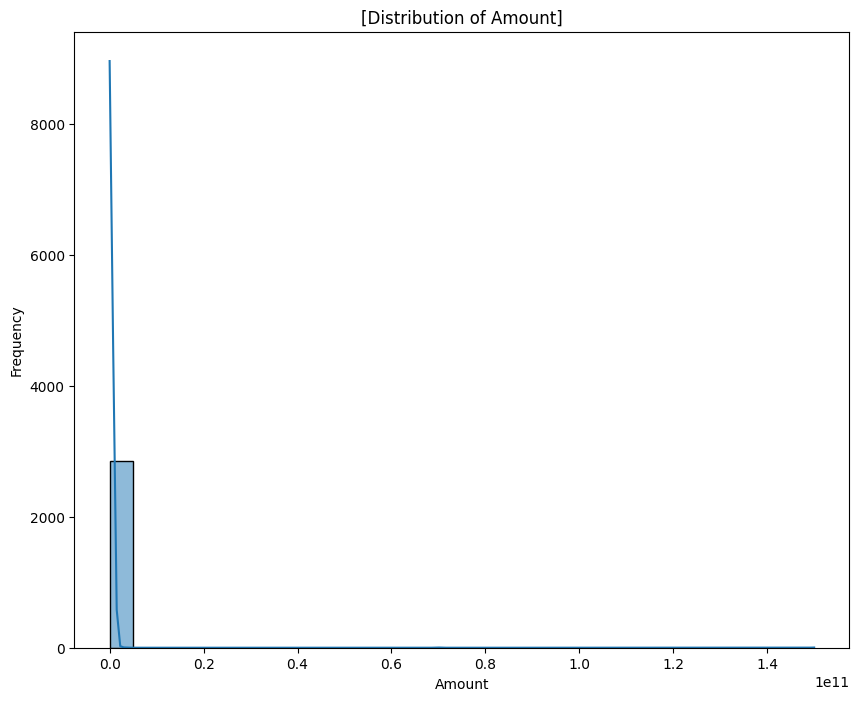

In [34]:
# Amount distribution
plt.figure(figsize=(10, 8))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title('[Distribution of Amount]')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

## Analytical Questions
1. How does the total investment compare across different sectors? What are the top five most funded sectors.
2. Are companies(founded) between 2015-2020 affected by funding at the stage they are at? What are the top 5 stages.
3. Which cities have received the most funding? Analyze the top 5 cities
4. Examine the top 4 investors that have put in more funds for the top 5 sectors.
5. What is the variation of funds received by startups yearly?

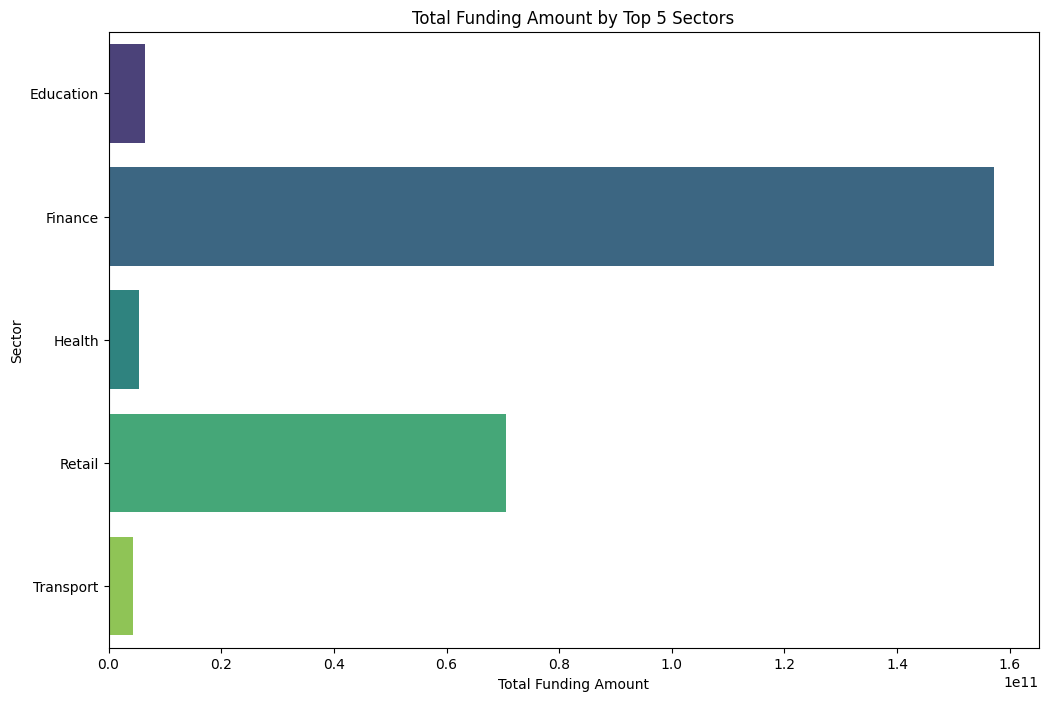

In [35]:
# 1.
top_5_sectors = df.groupby('Sector')['Amount'].sum().nlargest(5).index
top_5_df = df[df['Sector'].isin(top_5_sectors)]
top_5_sector_funding = top_5_df.groupby('Sector')['Amount'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_sector_funding, y='Sector', x='Amount', palette='viridis')
plt.title('Total Funding Amount by Top 5 Sectors')
plt.xlabel('Total Funding Amount')
plt.ylabel('Sector')
plt.show()


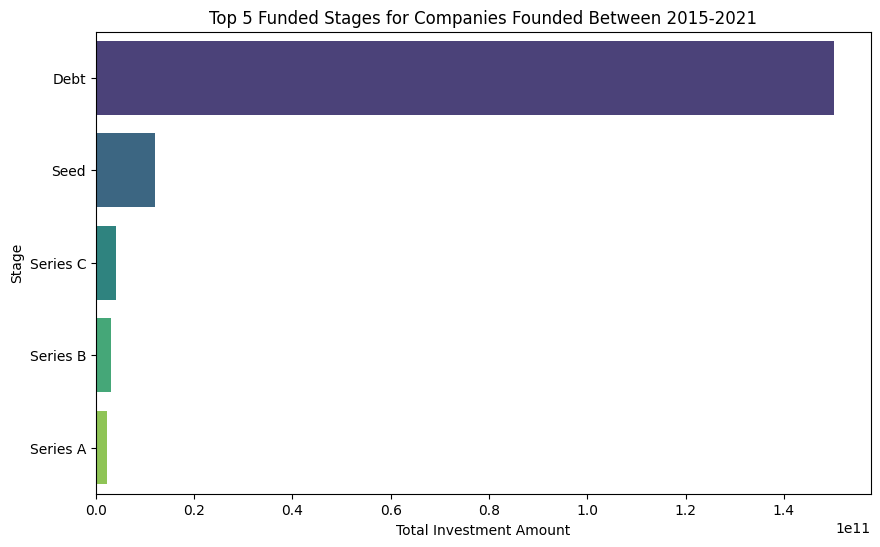

In [36]:
# 2.
new_df = df[(df['Founded'] >= 2015) & (df['Founded'] <= 2021)]
stage_investment = new_df.groupby('Stage')['Amount'].sum().reset_index()
sorted_stages = stage_investment.sort_values(by='Amount', ascending=False)
top_5_stages = sorted_stages.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_stages, y='Stage', x='Amount', palette='viridis')
plt.title('Top 5 Funded Stages for Companies Founded Between 2015-2021')
plt.xlabel('Total Investment Amount')
plt.ylabel('Stage')
plt.show()




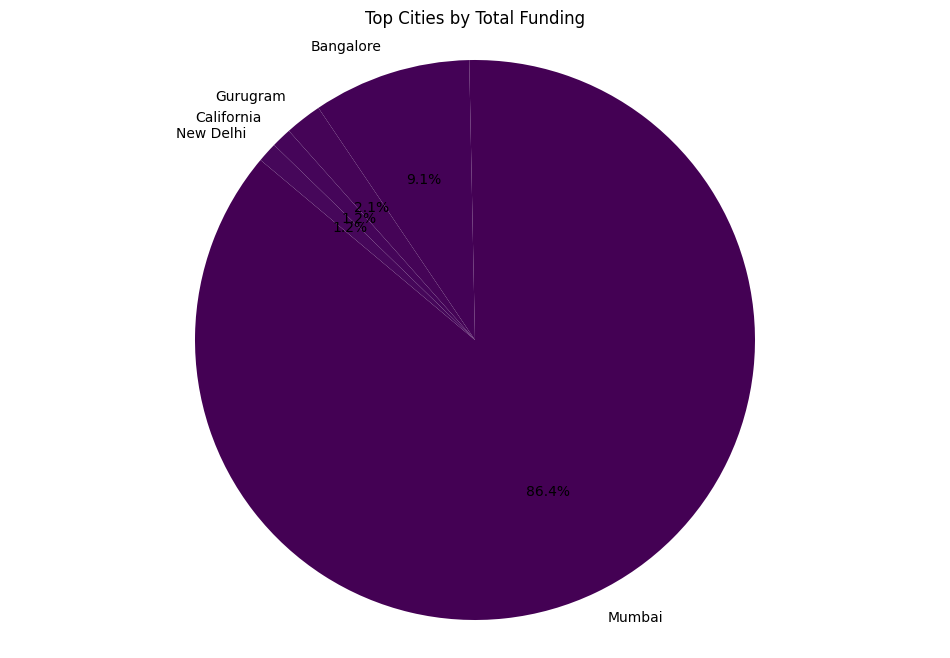

In [37]:
# 3.
city_investment = df.groupby('HeadQuarter')['Amount'].sum().reset_index()
sorted_cities = city_investment.sort_values(by='Amount', ascending=False)
top_cities = sorted_cities.head(5)
plt.figure(figsize=(12, 8))
plt.pie(top_cities['Amount'], labels=top_cities['HeadQuarter'], autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis.colors)
plt.title('Top Cities by Total Funding')
plt.axis('equal')  
plt.show()


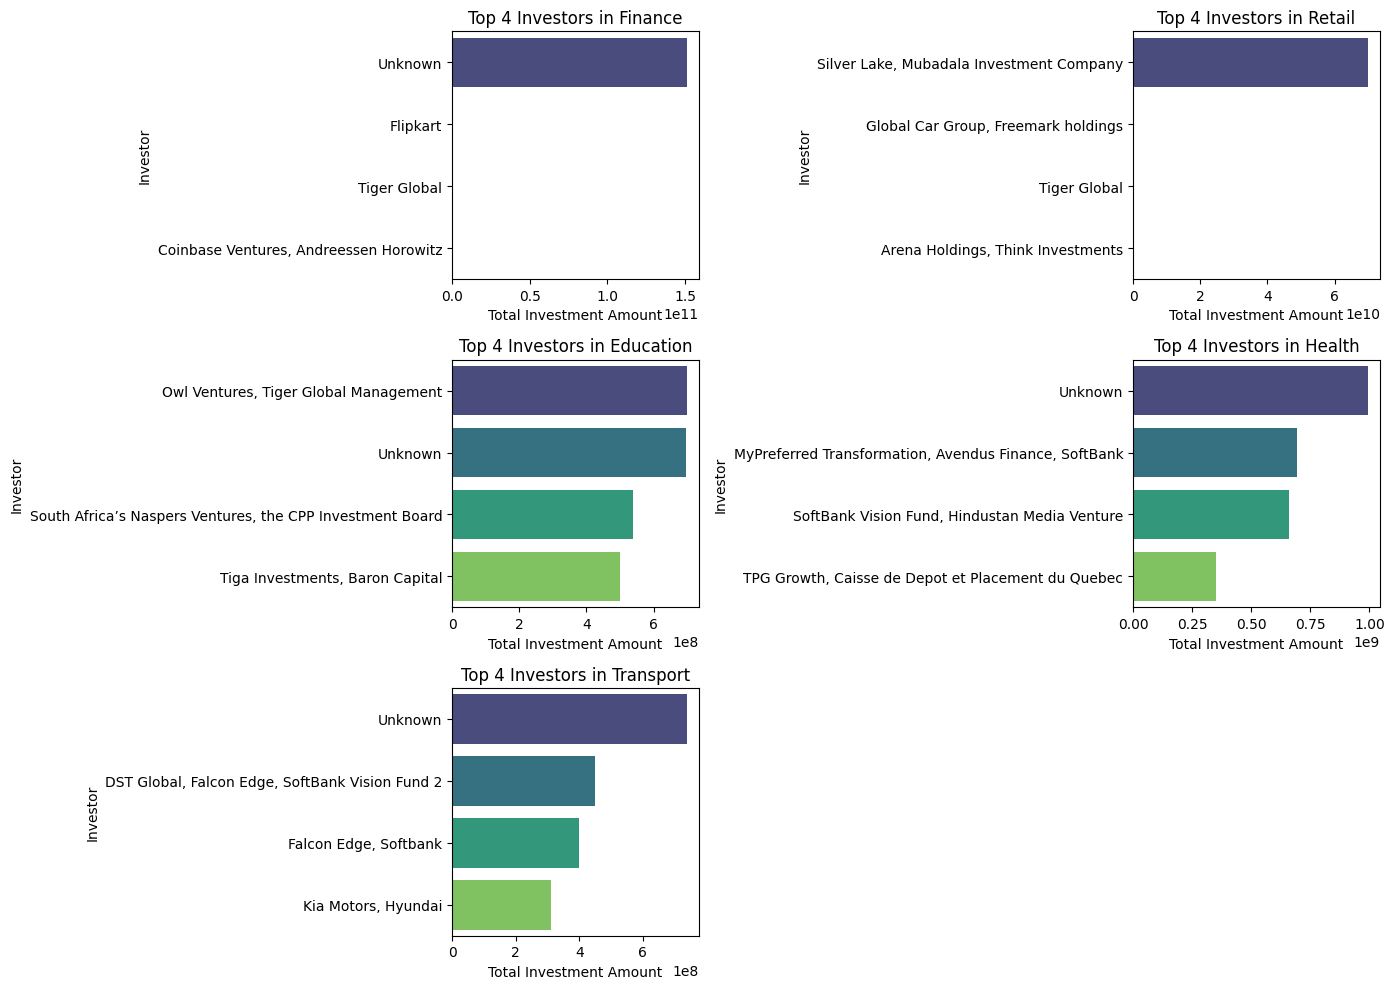

In [38]:
# 4.
top_5_sectors = df.groupby('Sector')['Amount'].sum().nlargest(5).index
Sector_df = df[df['Sector'].isin(top_5_sectors)]
investor_funding = Sector_df.groupby(['Sector', 'Investor'])['Amount'].sum().reset_index()
top_investors_per_sector = investor_funding.groupby('Sector').apply(lambda x: x.nlargest(4, 'Amount')).reset_index(drop=True)
plt.figure(figsize=(14, 10))
for i, sector in enumerate(top_5_sectors):
    plt.subplot(3, 2, i+1)
    sector_data = top_investors_per_sector[top_investors_per_sector['Sector'] == sector]
    sns.barplot(data=sector_data, y='Investor', x='Amount', palette='viridis')
    plt.title(f'Top 4 Investors in {sector}')
    plt.xlabel('Total Investment Amount')
    plt.ylabel('Investor')

plt.tight_layout()
plt.show()


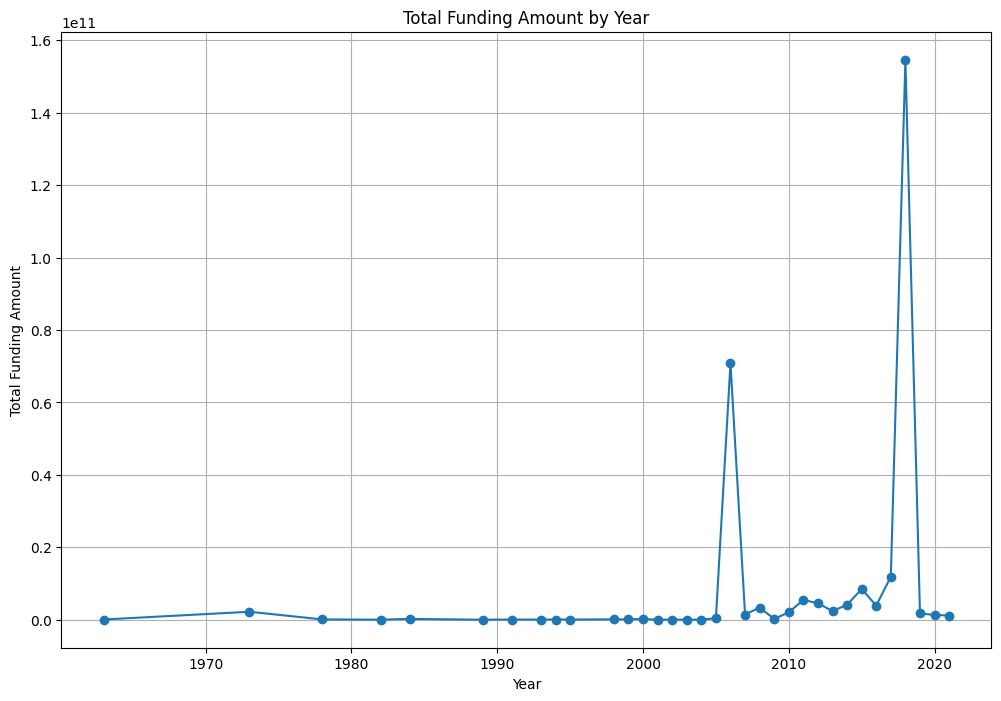

In [39]:
# 5.
yearly_funding = df.groupby('Founded')['Amount'].sum().reset_index()
plt.figure(figsize=(12, 8))
plt.plot(yearly_funding['Founded'], yearly_funding['Amount'], marker='o', linestyle='-')
plt.title('Total Funding Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount')
plt.grid(True)
plt.show()


## Conclusion and Recommendation

After exploring and analyzing the data, I have made the following observations:
- Majority of startup companies are mostly found in finance followed by education and completing the top three is haealth. The count of companies by sectors is lead by these three(3).
- Between 2015 and 2018 dtartups founded within these periods, 2018 raised the most funds followed by 2017. 
- For the startups, funding was mainly received by those in finance seconded by retail and education rounding up the top three sectors.
- Companies with their headquarters located in Mumbai received the most funding. Bangalore and Gurugram follow.
- The distribution of funding amongst companies from 1970 remained fairly even with fluctuations with 2006 and 2018(the highest) having high peaks of funding. 

### Reccommendation
For any startup looking to enter the market, I will recommend looking at the finance and retail sector and positioning themselves mainly within Mumbai or Bangalore as investors clearly are fond of putting their funds towards these locations.